<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [ ]:
!pip install yfinance

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [ ]:


START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2015-01-01 00:00:00+00:00,1070.640503,1272.775024,1283.500000,1270.500000,1283.500000,366830
1,2015-01-02 00:00:00+00:00,1084.898560,1289.724976,1295.474976,1275.300049,1275.500000,925740
2,2015-01-05 00:00:00+00:00,1068.411743,1270.125000,1299.949951,1262.324951,1290.500000,1754242
3,2015-01-06 00:00:00+00:00,1029.023193,1223.300049,1264.550049,1220.000000,1264.550049,2423784
4,2015-01-07 00:00:00+00:00,1016.868225,1208.849976,1239.574951,1203.724976,1235.000000,2636332


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-4-8097d146b7ad>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,1272.775024,1283.500000,1270.500000,1283.500000,366830
1,1289.724976,1295.474976,1275.300049,1275.500000,925740
2,1270.125000,1299.949951,1262.324951,1290.500000,1754242
3,1223.300049,1264.550049,1220.000000,1264.550049,2423784
4,1208.849976,1239.574951,1203.724976,1235.000000,2636332


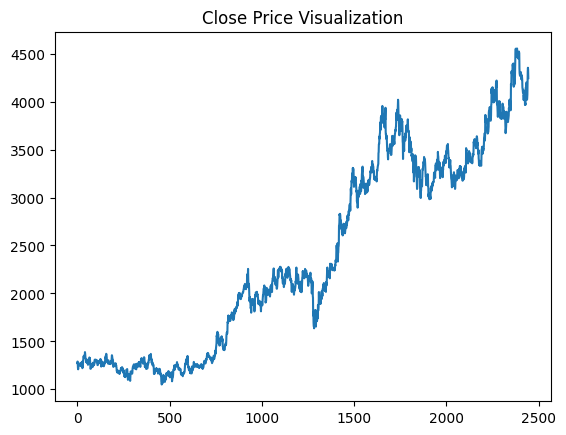

In [ ]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,1272.775024,1283.500000,1270.500000,1283.500000,366830
1,1289.724976,1295.474976,1275.300049,1275.500000,925740
2,1270.125000,1299.949951,1262.324951,1290.500000,1754242
3,1223.300049,1264.550049,1220.000000,1264.550049,2423784
4,1208.849976,1239.574951,1203.724976,1235.000000,2636332
...,...,...,...,...,...
2440,4244.600098,4254.950195,4054.000000,4071.000000,3096553
2441,4315.100098,4328.100098,4252.200195,4280.000000,4052167
2442,4352.700195,4366.600098,4310.000000,4321.049805,2060669


# Plotting moving averages of 100 day

---



In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2440,4244.808496
2441,4248.177498
2442,4251.530500
2443,4255.203499


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

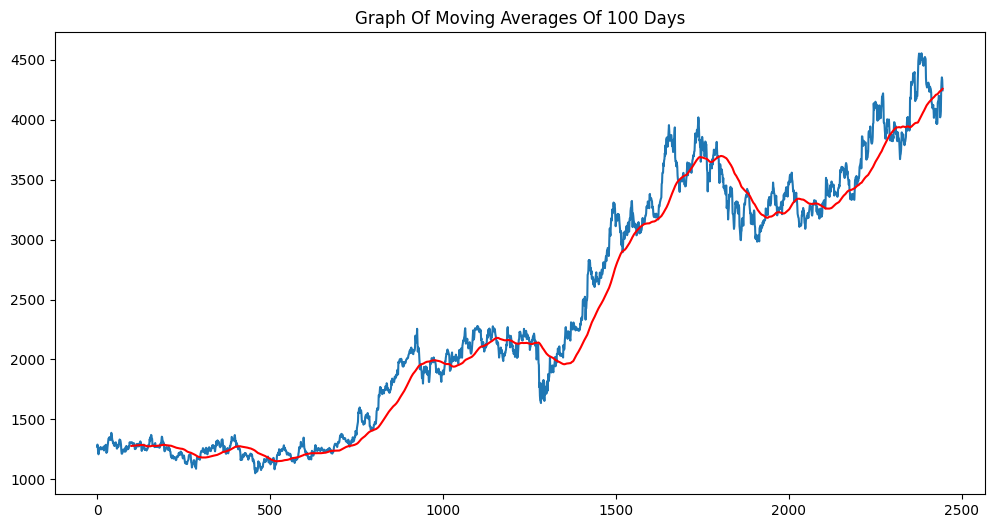

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2441,4095.330499
2442,4097.823251
2443,4099.654500
2444,4101.012499


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

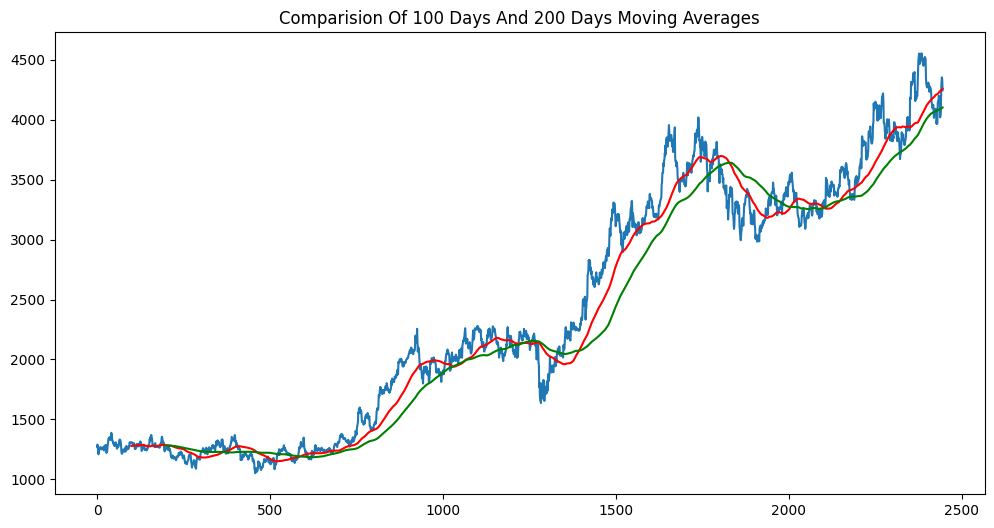

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(2445, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1711, 7)
(734, 7)


In [ ]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2015-01-01 00:00:00+00:00,1086.799072,1272.775024,1283.500000,1270.500000,1283.500000,366830
1,2015-01-02 00:00:00+00:00,1101.272583,1289.724976,1295.474976,1275.300049,1275.500000,925740
2,2015-01-05 00:00:00+00:00,1084.536743,1270.125000,1299.949951,1262.324951,1290.500000,1754242
3,2015-01-06 00:00:00+00:00,1044.553711,1223.300049,1264.550049,1220.000000,1264.550049,2423784
4,2015-01-07 00:00:00+00:00,1032.214966,1208.849976,1239.574951,1203.724976,1235.000000,2636332


In [ ]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
1711,2021-12-09 00:00:00+00:00,3442.314697,3601.750000,3634.75,3566.000000,3610.0,1567957
1712,2021-12-10 00:00:00+00:00,3475.813477,3636.800049,3642.00,3575.100098,3585.0,1510718
1713,2021-12-13 00:00:00+00:00,3449.865234,3609.649902,3662.00,3601.699951,3650.0,1883864
1714,2021-12-14 00:00:00+00:00,3463.388916,3623.800049,3635.00,3576.699951,3605.0,1747007
1715,2021-12-15 00:00:00+00:00,3412.305176,3570.350098,3623.00,3558.149902,3620.0,1603233


# Using MinMax scaler for normalization of the dataset

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.085089  ],
       [0.08675914],
       [0.08224457],
       ...,
       [0.86847828],
       [0.86927856],
       [0.89596563]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1611, 100, 1)

# ML Model (LSTM)

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 19s 266ms/step - loss: 0.0869 - mean_absolute_error: 0.2061
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 268ms/step - loss: 0.0071 - mean_absolute_error: 0.0565
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 270ms/step - loss: 0.0059 - mean_absolute_error: 0.0502
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - loss: 0.0063 - mean_absolute_error: 0.0504
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 14s 265ms/step - loss: 0.0059 - mean_absolute_error: 0.0508
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 266ms/step - loss: 0.0055 - mean_absolute_error: 0.0481
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 317ms/step - loss: 0.0050 - mean_absolute_error: 0.0475
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 18s 266ms/step - loss: 0.0057 - mean_absolute_error: 0.0515
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 20s 259ms/step - loss: 0.0046 - mean_absolute_error: 0.0446
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 268ms/step - loss: 0.0044 - mean_absolute_error: 0.0448
Epoch 11/

In [ ]:
model.save('keras_model.h5')

In [ ]:

test_close.shape
test_close

array([[3566.        ],
       [3575.10009766],
       [3601.69995117],
       [3576.69995117],
       [3558.14990234],
       [3570.        ],
       [3573.69995117],
       [3510.14990234],
       [3566.39990234],
       [3606.25      ],
       [3630.        ],
       [3644.80004883],
       [3653.10009766],
       [3693.85009766],
       [3685.        ],
       [3680.        ],
       [3731.30004883],
       [3745.        ],
       [3811.69995117],
       [3812.39990234],
       [3772.        ],
       [3796.39990234],
       [3861.        ],
       [3856.        ],
       [3836.55004883],
       [3857.        ],
       [3860.05004883],
       [3962.30004883],
       [3980.        ],
       [3910.5       ],
       [3811.        ],
       [3771.10009766],
       [3740.10009766],
       [3722.19995117],
       [3625.10009766],
       [3646.        ],
       [3721.39990234],
       [3736.39990234],
       [3800.64990234],
       [3816.05004883],
       [3769.        ],
       [3756.149

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
import pandas as pd

# Assuming past_100_days and test_df are already defined DataFrames
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,3185.000000
1,3194.000000
2,3192.000000
3,3176.000000
4,3156.149902


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.1632511 ],
       [0.16892611],
       [0.167665  ],
       [0.15757609],
       [0.14505947],
       [0.16640388],
       [0.17690259],
       [0.16693992],
       [0.14821226],
       [0.13008375],
       [0.16659308],
       [0.14896905],
       [0.15190108],
       [0.18465847],
       [0.2112995 ],
       [0.21211925],
       [0.21369564],
       [0.2420707 ],
       [0.24560188],
       [0.25285329],
       [0.25215961],
       [0.27202215],
       [0.32183614],
       [0.3385459 ],
       [0.38495494],
       [0.3618765 ],
       [0.4009079 ],
       [0.421401  ],
       [0.42937764],
       [0.45513579],
       [0.45715369],
       [0.48016902],
       [0.49016325],
       [0.49240176],
       [0.50186011],
       [0.55391261],
       [0.55987134],
       [0.55624564],
       [0.52329904],
       [0.52897406],
       [0.53023517],
       [0.56680746],
       [0.59266029],
       [0.60911789],
       [0.55419633],
       [0.55599348],
       [0.56469504],
       [0.584

In [ ]:
input_data.shape

(834, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(734, 100, 1)
(734,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step


In [ ]:
y_pred.shape

(734, 1)

In [ ]:
y_test

array([0.40349325, 0.40923138, 0.4260041 , 0.41024018, 0.39854332,
       0.40601548, 0.4083485 , 0.36827659, 0.40374541, 0.42887316,
       0.44384888, 0.45318116, 0.45841481, 0.48411   , 0.47852951,
       0.47537673, 0.50772432, 0.51636292, 0.55842103, 0.55886239,
       0.53338795, 0.54877348, 0.58950751, 0.58635473, 0.57409043,
       0.58698528, 0.58890851, 0.65338295, 0.66454377, 0.62072007,
       0.55797967, 0.53282051, 0.51327325, 0.50198619, 0.44075922,
       0.45393779, 0.50148172, 0.51094007, 0.55145334, 0.56116401,
       0.53149628, 0.52339357, 0.50122956, 0.51705659, 0.52456016,
       0.48168229, 0.49429343, 0.51825459, 0.55482688, 0.53780185,
       0.524308  , 0.49148748, 0.40601548, 0.39696692, 0.29320892,
       0.33791534, 0.33406888, 0.36565984, 0.38085632, 0.35371082,
       0.31871491, 0.33665422, 0.42307207, 0.43439053, 0.42042376,
       0.41232104, 0.41572599, 0.43517873, 0.46295479, 0.43439053,
       0.4406961 , 0.48168229, 0.48483508, 0.47033227, 0.46352

In [ ]:
y_pred

array([[-0.00444524],
       [-0.00449474],
       [-0.00455095],
       [-0.00461255],
       [-0.0046772 ],
       [-0.00474176],
       [-0.00480391],
       [-0.00486221],
       [-0.00491331],
       [-0.00495665],
       [-0.00499444],
       [-0.00503017],
       [-0.00506728],
       [-0.00510828],
       [-0.0051559 ],
       [-0.00521122],
       [-0.00527359],
       [-0.00534337],
       [-0.00542089],
       [-0.00550798],
       [-0.00560561],
       [-0.00571165],
       [-0.00582358],
       [-0.00594113],
       [-0.00606372],
       [-0.00618926],
       [-0.00631584],
       [-0.00644162],
       [-0.00656873],
       [-0.00669991],
       [-0.00683378],
       [-0.00696341],
       [-0.00708027],
       [-0.00717668],
       [-0.00724738],
       [-0.00728629],
       [-0.00729108],
       [-0.00726676],
       [-0.00722135],
       [-0.00716551],
       [-0.00710916],
       [-0.00705758],
       [-0.00701271],
       [-0.0069734 ],
       [-0.00693879],
       [-0

In [ ]:
scaler.scale_

array([0.00063056])

In [ ]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

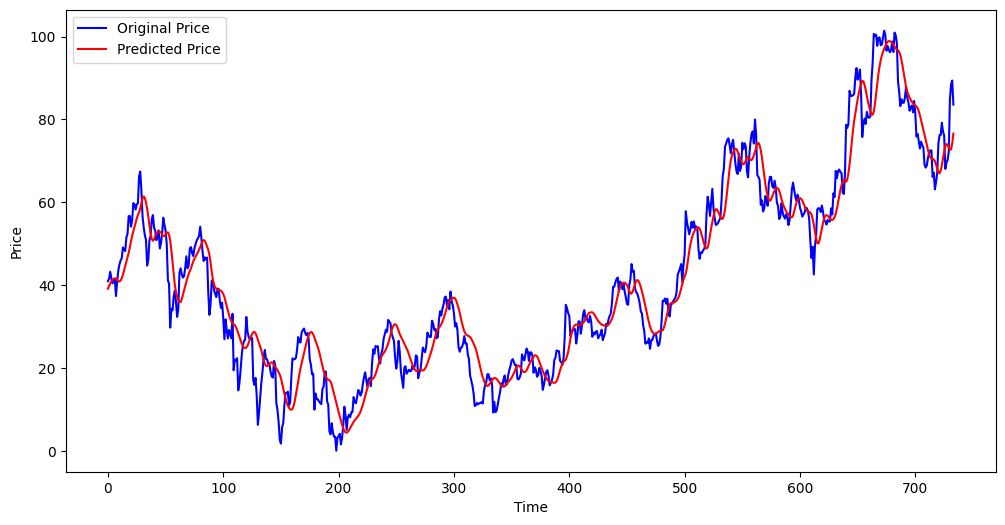

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.738869001193103
